# LAB 4

## Question 4.a

$$y'' - {(y')}^2 - {y}^2 + y + 1 = 0$$

wrt: 
$$y(0) = \frac{1}{2}$$
$$y(\pi) = -\frac{1}{2}$$

In [69]:
import numpy as np
import pandas as pd

In [70]:
x1 = 0
x2 = np.pi
ep = 0.01

In [71]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(n=3):
    h = np.pi/n
    
    y = np.zeros(n+1)
    x_f = np.zeros(n+1)
    
    
    
    for i in range(n+1):
        x_f[i] = (i)*h
        y[i] = 0.5 - np.sin(i*h/2)
    
    
    flag = 0
    while flag!=1:
        a = np.zeros(n-1)
        b = np.zeros(n-1)
        c = np.zeros(n-1)
        d = np.zeros(n-1)
        res = np.zeros(n-1)
        
        
        for i in range(n-1):
            a[i] = ( 1/(h*h) - (y[i+2] - y[i])/(2*h*h) )

        for i in range(n-1):
            b[i] = ( -2/(h*h) - 2*y[i+1] + 1 )

        for i in range(n-1):
            c[i] = ( 1/(h*h) - (y[i+2] - y[i])/(2*h*h) )
            
        for i in range(n-1):
            d[i] = ( -1*(y[i]-2*y[i+1]+y[i+2])/(h*h) 
                    + ((y[i+2] - y[i])*(y[i+2] - y[i]))/(4*h*h) 
                    + y[i+1]*y[i+1] - y[i+1] - 1 )

        c_, d_ = thomas_(a,b,c,d)

        res[-1] = d_[-1]
        for i in range(n-2):
            res[n-3-i] = d_[n-3-i] - res[n-2-i]*c_[n-3-i]
        
        #print(res)
        #print(y)
        for i in range(1,n):
            y[i] = y[i] + res[i-1]
        
        flag=1
        for i in range(n-1):
            if res[i]>ep or res[i]<ep*-1 :
                flag=0
    
    
        
    return [y, x_f]

In [72]:
a_1, x_1 = main_(3)
a_2, x_2 = main_(5)
a_3, x_3 = main_(7)
a_4, x_4 = main_(8)

print(np.pi/3, np.pi/6, np.pi/15, np.pi/50)

1.0471975511965976 0.5235987755982988 0.20943951023931953 0.06283185307179587


In [73]:
a_3

array([ 0.5       ,  0.09555128, -0.34797797, -0.72536001, -0.95540827,
       -0.99105356, -0.82717357, -0.5       ])

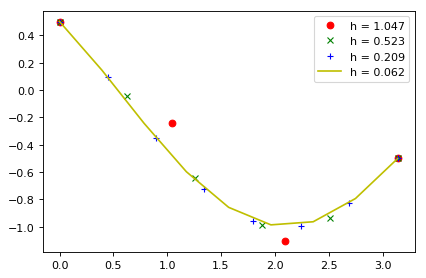

In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 1.047')
plt.plot(x_2, (a_2),  'gx', label = 'h = 0.523')
plt.plot(x_3, (a_3),  'b+', label = 'h = 0.209')
plt.plot(x_4, (a_4), 'y-', label = 'h = 0.062')
plt.legend(loc='best')
plt.show()

\pagebreak

## Question 4.b

$$ y'' = 2 + y^2 $$
Subject to:
$$y(0) = 0$$
$$y(1) = 0$$

In [77]:
x1 = 0
x2 = 1
#h = np.pi/n
ep = 0.005

In [78]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(n=3):
    h = x2/n
    
    y = np.zeros(n+1)
    x_f = np.zeros(n+1)
    
    
    
    for i in range(n+1):
        x_f[i] = x1+(i)*h
        y[i] =  x_f[i]*(1-x_f[i])
    
    flag = 0
    while flag!=1:
        a = np.zeros(n-1)
        b = np.zeros(n-1)
        c = np.zeros(n-1)
        d = np.zeros(n-1)
        res = np.zeros(n-1)
        
        for i in range(n-1):
            res[i] = 0
        
        for i in range(n-1):
            a[i] = ( 1/(h*h) )

        for i in range(n-1):
            b[i] = ( -2/(h*h) - 2*y[i+1] )

        for i in range(n-1):
            c[i] = ( 1/(h*h) )
            
        for i in range(n-1):
            d[i] = ( 2 + y[i+1]*y[i+1] - (y[i+2]-2*y[i+1]+y[i])/(h*h) )

        c_, d_ = thomas_(a,b,c,d)


        res[-1] = d_[-1]
        for i in range(n-2):
            res[n-3-i] = d_[n-3-i] - res[n-2-i]*c_[n-3-i]
                    
        for i in range(1,n):
            y[i] = y[i] + res[i-1]
        
        flag=1
        for i in range(n-1):
            if res[i]>ep or res[i]<ep*-1 :
                flag=0
    
    
        
    return [y, x_f]

In [79]:
a_1, x_1 = main_(3)
a_2, x_2 = main_(10)
a_3, x_3 = main_(16)
a_4, x_4 = main_(30)

print(1/3, 1/10, 1/16, 1/50)

0.3333333333333333 0.1 0.0625 0.02


In [80]:
import pandas as pd
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_4, a_4)), columns=["x", "predicted"]))

          x  predicted
0  0.000000   0.000000
1  0.333333  -0.227998
2  0.666667  -0.227998
3  1.000000   0.000000

      x  predicted
0   0.0   0.000000
1   0.1  -0.091744
2   0.2  -0.163404
3   0.3  -0.214797
4   0.4  -0.245729
5   0.5  -0.256057
6   0.6  -0.245729
7   0.7  -0.214797
8   0.8  -0.163404
9   0.9  -0.091744
10  1.0   0.000000

         x  predicted
0   0.0000   0.000000
1   0.0625  -0.059684
2   0.1250  -0.111541
3   0.1875  -0.155537
4   0.2500  -0.191626
5   0.3125  -0.219760
6   0.3750  -0.239892
7   0.4375  -0.251987
8   0.5000  -0.256021
9   0.5625  -0.251987
10  0.6250  -0.239892
11  0.6875  -0.219760
12  0.7500  -0.191626
13  0.8125  -0.155537
14  0.8750  -0.111541
15  0.9375  -0.059684
16  1.0000   0.000000

           x  predicted
0   0.000000   0.000000
1   0.033333  -0.032803
2   0.066667  -0.063384
3   0.100000  -0.091737
4   0.133333  -0.117859
5   0.166667  -0.141743
6   0.200000  -0.163382
7   0.233333  -0.182770
8   0.266667  -0.199899
9   0.300000  -0.2

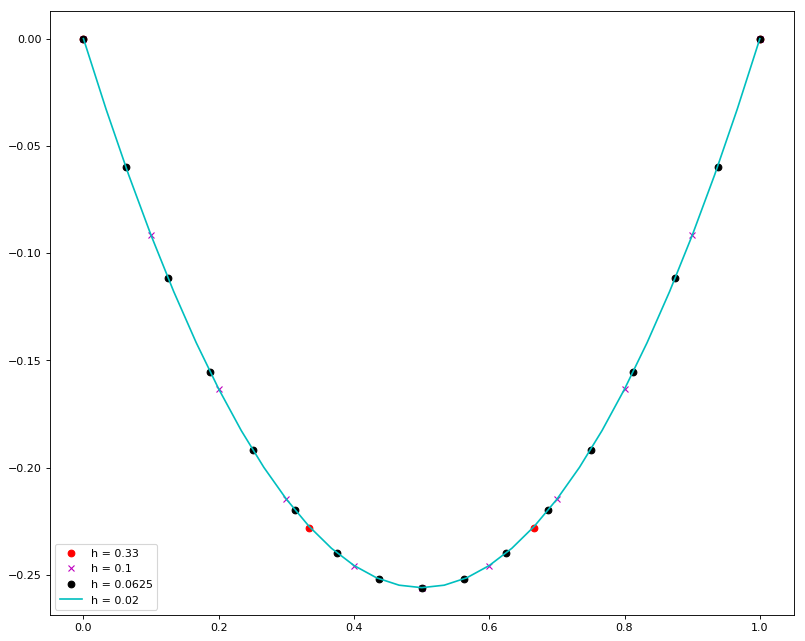

In [81]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 0.33')
plt.plot(x_2, (a_2),  'mx', label = 'h = 0.1')
plt.plot(x_3, (a_3),  'ko', label = 'h = 0.0625')
plt.plot(x_4, (a_4), 'c-', label = 'h = 0.02')
plt.legend(loc='best')
plt.show()

\pagebreak

## Question 4.c

$$f''' + ff' + 1 + (f')^2 = 0$$

wrt: 
$$f(0) = 0$$
$$f'(0) = 1$$
$$f'(10) = 1$$

In [8]:
x1 = 0
x2 = 10
y1_ = 0
y2_ = 1
h = 1

In [28]:
int((x2-x1)/h)

10

In [62]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.shape)
    d_ = np.zeros(d.shape)

    c_[0] = np.dot(np.linalg.inv(b[0]), c[0] )
    d_[0] = np.dot(np.linalg.inv(b[0]), d[0] )

    for i in range(1, c.shape[0]-1):
        c_[i] = np.dot( np.linalg.inv(b[i] - np.dot(a[i], c_[i-1])), c[i] )

    for i in range(1, d.shape[0]):
        d_[i] = np.dot( np.linalg.inv(b[i] - np.dot(a[i], c_[i-1])), d[i] - np.dot(a[i], d_[i-1]) )

    return [c_, d_]


def main_(n=3):
    e = 0.001
    h = (x2-x1)/n

    a = np.zeros((n-1,2,2))
    b = np.zeros((n-1,2,2))
    c = np.zeros((n-1,2,2))
    d = np.zeros((n-1,2))
    x_f = np.zeros((n+1)) 
    
    f = np.zeros(n+1)
    F = np.zeros(n+1)
    for i in range(n+1):
        x_f[i] = x1 + i*h
        f[i] = 101*x_f[i]*x_f[i]/20 - x_f[i]*x_f[i]*x_f[i]/3
        F[i] = x_f[i]*(10.1 - x_f[i])
#     print(F)
#     print(f)
    
    #print(x_f)
    res_final = np.zeros(n-1)
    
    flag=20
    while flag!=1:
        
        for i in range(0, n-1):
            a[i][0][0] = -1
            a[i][0][1] = -1*h/2
            a[i][1][0] = 0
            a[i][1][1] = 1/(h*h) - f[i+1]/(2*h)

        for i in range(0, n-1):
            b[i][0][0] = 1
            b[i][0][1] = -1*h/2
            b[i][1][0] = (F[i+2]-F[i])/(2*h)
            b[i][1][1] = -2/(h*h) - 2*F[i+1]

        for i in range(0, n-1):
            c[i][0][0] = 0
            c[i][0][1] = 0
            c[i][1][0] = 0
            c[i][1][1] = 1/(h*h) + f[i+1]/(2*h)

        for i in range(0, n-1):
            d[i][0] = f[i]-f[i+1]+(h/2)*(F[i+1]+F[i])
            d[i][1] = -1 + F[i+1]*F[i+1] - (F[i+2]-2*F[i+1]+F[i])/(h*h) - f[i+1]*(F[i+2]-F[i])/(2*h)


        c_,d_ = thomas_(a,b,c,d)

        res = np.zeros((n-1,2))

        res[-1] = d_[-1]
        for i in range(n-2):
            res[n-3-i] = d_[n-3-i] - np.dot(c_[n-3-i], res[n-2-i])
            
#         print(res[:,0])

        f[1:-1] = f[1:-1] + res[:,0]
        F[1:-1] = F[1:-1] + res[:,1]
        #print(f)
        
        flag = flag -1
        

        
    return [f[:-1], x_f[:-1]]

In [63]:
a_1, x_1 = main_(3)
a_2, x_2 = main_(5)
a_3, x_3 = main_(9)
a_4, x_4 = main_(19)

In [65]:
import pandas as pd
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_4, a_4)), columns=["x", "predicted"]))

          x  predicted
0  0.000000   0.000000
1  3.333333   1.792418
2  6.666667   5.211156

     x  predicted
0  0.0        0.0
1  2.0        1.0
2  4.0        3.0
3  6.0        5.0
4  8.0        7.0

          x  predicted
0  0.000000   0.000000
1  1.111111   0.456834
2  2.222222   1.465248
3  3.333333   2.572728
4  4.444444   3.684116
5  5.555556   4.795179
6  6.666667   5.906302
7  7.777778   7.017408
8  8.888889   8.128520

           x  predicted
0   0.000000   0.000000
1   0.526316   0.135743
2   1.052632   0.481954
3   1.578947   0.937480
4   2.105263   1.440731
5   2.631579   1.961052
6   3.157895   2.486192
7   3.684211   3.012349
8   4.210526   3.538652
9   4.736842   4.064968
10  5.263158   4.591283
11  5.789474   5.117599
12  6.315789   5.643915
13  6.842105   6.170231
14  7.368421   6.696547
15  7.894737   7.222862
16  8.421053   7.749178
17  8.947368   8.275494
18  9.473684   8.801810


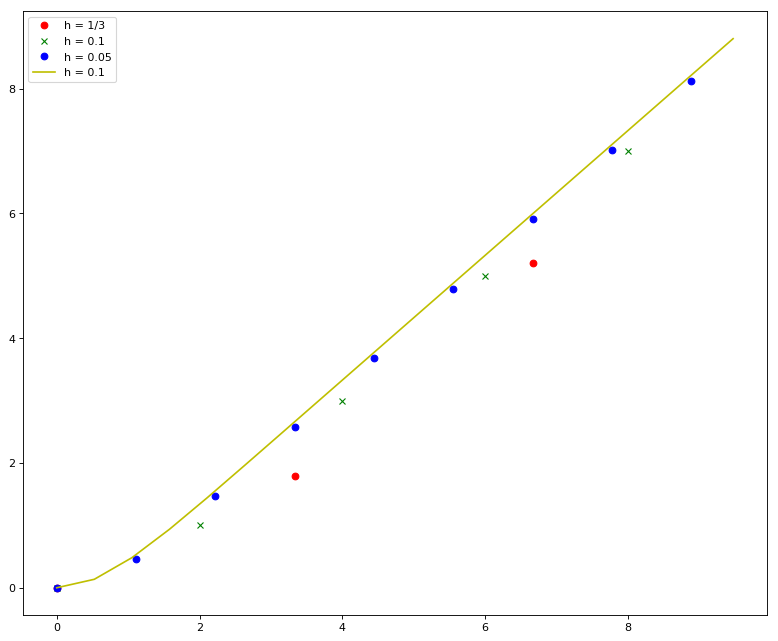

In [68]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 1/3')
plt.plot(x_2, (a_2),  'gx', label = 'h = 0.1')
plt.plot(x_3, (a_3),  'bo', label = 'h = 0.05')
plt.plot(x_4, (a_4), 'y-', label = 'h = 0.1')
plt.legend(loc='best')
plt.show()